<a href="https://colab.research.google.com/github/HYUNSOOLEE-6839/colab-Deep-Learning/blob/main/Dog_vs_Cat_ver1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dog vs Cat

In [9]:
import keras
from keras.preprocessing import image
from glob import glob
import cv2, os
import numpy as np
import matplotlib.pyplot as plt

In [10]:
!ls

drive  sample_data  train


In [52]:
path = './train/'

ROW, COL = 96, 96

In [53]:
dogs, cats = [], []
y_dogs, y_cats = [], []

### 데이터 전처리

In [54]:
 def load_dogs():
    print('Loading all dog images\n')
    dog_path = os.path.join(path, 'dog*')
    for dog_img in glob(dog_path):
        dog = cv2.imread(dog_img)
        dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)
        dog = cv2.resize(dog, (ROW, COL))
        dog = image.img_to_array(dog)
        dogs.append(dog)
    print('All dog images loaded')

In [55]:
def load_cats():
    print('Loading all cat images\n')
    cat_path = os.path.join(path, 'cat*')
    for cat_img in glob(cat_path):
        cat = cv2.imread(cat_img)
        cat = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
        cat = cv2.resize(cat, (ROW, COL))
        cat = image.img_to_array(cat)
        cats.append(cat)
    print('All cat images loaded')

In [56]:
load_dogs()

Loading all dog images

All dog images loaded


In [57]:
load_cats()

Loading all cat images

All cat images loaded


In [58]:
print('강아지 사진 수 : {} 고양이 사진 수 : {}'.format(len(dogs),len(cats)))

강아지 사진 수 : 12500 고양이 사진 수 : 12500


In [59]:
classes = ['dog', 'cat']

In [60]:
import random

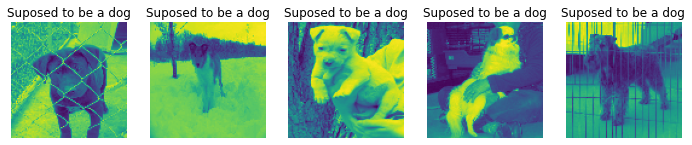

In [61]:
plt.figure(figsize=(12,8))

for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(dogs))
    plt.imshow(img)
    
    plt.axis('off')
    plt.title('Suposed to be a {}'.format(classes[0]))
    
plt.show()

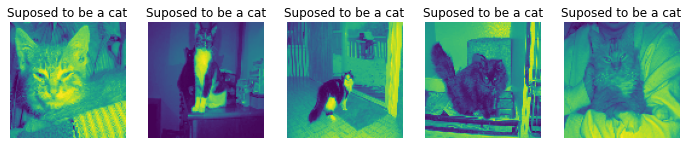

In [62]:
plt.figure(figsize=(12,8))

for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(cats))
    plt.imshow(img)
    
    plt.axis('off')
    plt.title('Suposed to be a {}'.format(classes[1]))
    
plt.show()

In [63]:
# 강아지에는 '1'이라는 라벨을 붙여주고, 고양이에는 '0'이라는 라벨을 붙여줌.
y_dogs = [1 for item in enumerate(dogs)]
y_cats = [0 for item in enumerate(cats)]

In [64]:
print('강아지 사진 수 : {} 고양이 사진 수 : {}'.format(len(y_dogs),len(y_cats)))

강아지 사진 수 : 12500 고양이 사진 수 : 12500


In [65]:
dogs = np.asarray(dogs).astype('float32')
cats = np.asarray(cats).astype('float32')
y_dogs = np.asarray(y_dogs).astype('int32')
y_cats = np.asarray(y_cats).astype('int32')
dogs /= 255
cats /= 255

In [66]:
X = np.concatenate((dogs,cats), axis=0)
y = np.concatenate((y_dogs, y_cats), axis=0)

### CNN 모델 적용

In [67]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Flatten, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.models import save_model, load_model

In [68]:
IMG_CHANNEL = 1
BATCH_SIZE = 128
N_EPOCH = 100
VERBOSE = 2
VALIDAION_SPLIT = .2
OPTIM = Adam()
N_CLASSES = len(classes)

In [69]:
y = np_utils.to_categorical(y, N_CLASSES)
print('One-Hot Encoding done')

One-Hot Encoding done


In [70]:
model = Sequential([
    Conv2D(32, (3,3), padding='same', input_shape=(ROW, COL, IMG_CHANNEL), activation='relu'),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(.5),
    Dense(N_CLASSES, activation='softmax')
])

In [71]:
print('The model was created by following config:')
model.summary()

The model was created by following config:
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 96, 96, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 48, 48, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling

In [72]:
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

In [73]:
checkpoint = ModelCheckpoint('model_checkpoint/dogs_vs_cats_redux_checkpoint.h5')

### 모델 실행

In [74]:
history = model.fit(X, y, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDAION_SPLIT, verbose=VERBOSE)

Epoch 1/100
157/157 - 16s - loss: 0.6840 - accuracy: 0.6172 - val_loss: 0.8233 - val_accuracy: 0.0036
Epoch 2/100
157/157 - 15s - loss: 0.6061 - accuracy: 0.6634 - val_loss: 0.6677 - val_accuracy: 0.7076
Epoch 3/100
157/157 - 15s - loss: 0.5398 - accuracy: 0.7233 - val_loss: 0.9017 - val_accuracy: 0.4454
Epoch 4/100
157/157 - 15s - loss: 0.4927 - accuracy: 0.7581 - val_loss: 0.5556 - val_accuracy: 0.7290
Epoch 5/100
157/157 - 15s - loss: 0.4498 - accuracy: 0.7921 - val_loss: 0.7072 - val_accuracy: 0.6208
Epoch 6/100
157/157 - 15s - loss: 0.4139 - accuracy: 0.8127 - val_loss: 0.6428 - val_accuracy: 0.6742
Epoch 7/100
157/157 - 15s - loss: 0.3648 - accuracy: 0.8369 - val_loss: 0.4979 - val_accuracy: 0.7612
Epoch 8/100
157/157 - 15s - loss: 0.3373 - accuracy: 0.8510 - val_loss: 0.7601 - val_accuracy: 0.6032
Epoch 9/100
157/157 - 15s - loss: 0.2930 - accuracy: 0.8745 - val_loss: 0.5692 - val_accuracy: 0.7308
Epoch 10/100
157/157 - 15s - loss: 0.2644 - accuracy: 0.8888 - val_loss: 0.5535 - 

In [75]:
scores = model.evaluate(X, y, verbose=2)
print('MODEL ACCURACY\n{}: {}'.format(model.metrics_names[1], scores[1]*100))

782/782 - 6s - loss: 0.2835 - accuracy: 0.9614
MODEL ACCURACY
accuracy: 96.14400267601013


In [77]:
history.history['loss'][0:4]

[0.6839843392372131,
 0.6061401963233948,
 0.5397956371307373,
 0.49268442392349243]

### 시각화

In [78]:
# 검증셋의 오차
# y_loss에 테스트셋으로 실험 결과의 오차 값을 저장
y_loss=history.history['loss']
# y_vloss에 훈련셋으로 실험 결과의 오차 값을 저장
y_vloss=history.history['val_loss']
# y_acc에 테스트셋으로 실험 결과의 오차 값을 저장
y_acc=history.history['accuracy']
# y_vacc에 훈련셋으로 실험 결과의 오차 값을 저장
y_vacc=history.history['val_accuracy']

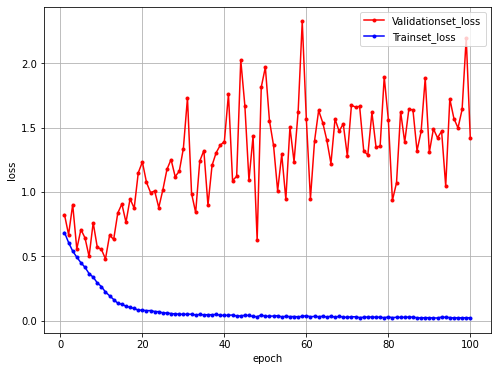

In [79]:
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_vloss, marker=".", c="red", label='Validationset_loss')
plt.plot(x_len, y_loss, marker=".", c="blue", label='Trainset_loss')
plt.grid()
plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

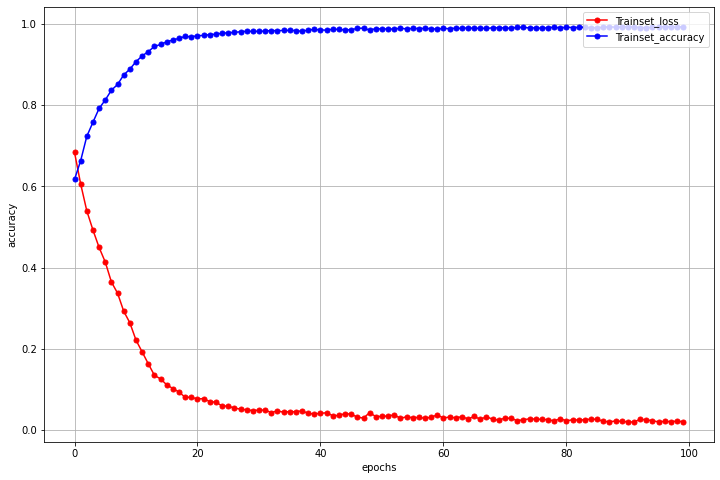

In [80]:
x_len = np.arange(len(y_acc))
plt.figure(figsize=(12,8))
plt.plot(x_len, y_loss, "o-", c="red", label='Trainset_loss', markersize=5)
plt.plot(x_len, y_acc, "o-", c="blue", label='Trainset_accuracy', markersize=5)
plt.grid()
plt.legend(loc='upper right')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()
plt.show()

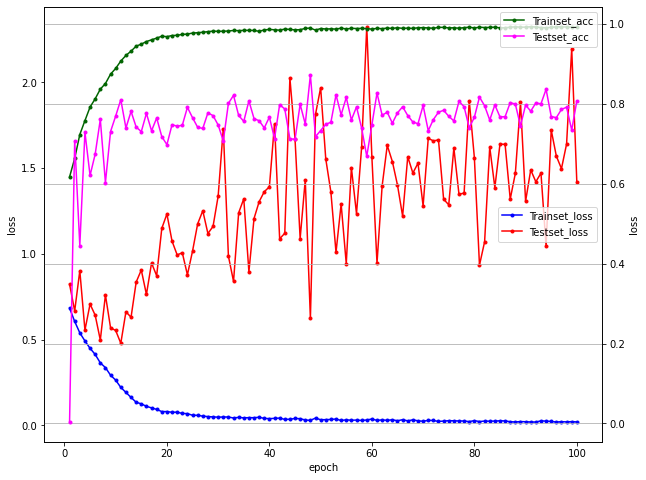

In [81]:
x_len = np.arange(1, len(y_loss)+1)
fig, ax0 = plt.subplots(figsize=(10,8))
ax1 = ax0.twinx()
ax0.plot(x_len, y_loss, marker=".", c="blue", label='Trainset_loss')
ax0.plot(x_len, y_vloss, marker=".", c="red", label='Testset_loss')
ax0.set_ylabel('loss')
ax1.plot(x_len, y_acc, marker=".", c="darkgreen", label='Trainset_acc')
ax1.plot(x_len, y_vacc, marker=".", c="magenta", label='Testset_acc')
ax1.set_ylabel('accuracy')
ax0.set_xlabel('epoch')
ax0.legend(loc='center right')
ax1.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()